In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')

submission = pd.read_csv('sample_submission_V2.csv')

In [2]:
train.head()
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [4]:
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

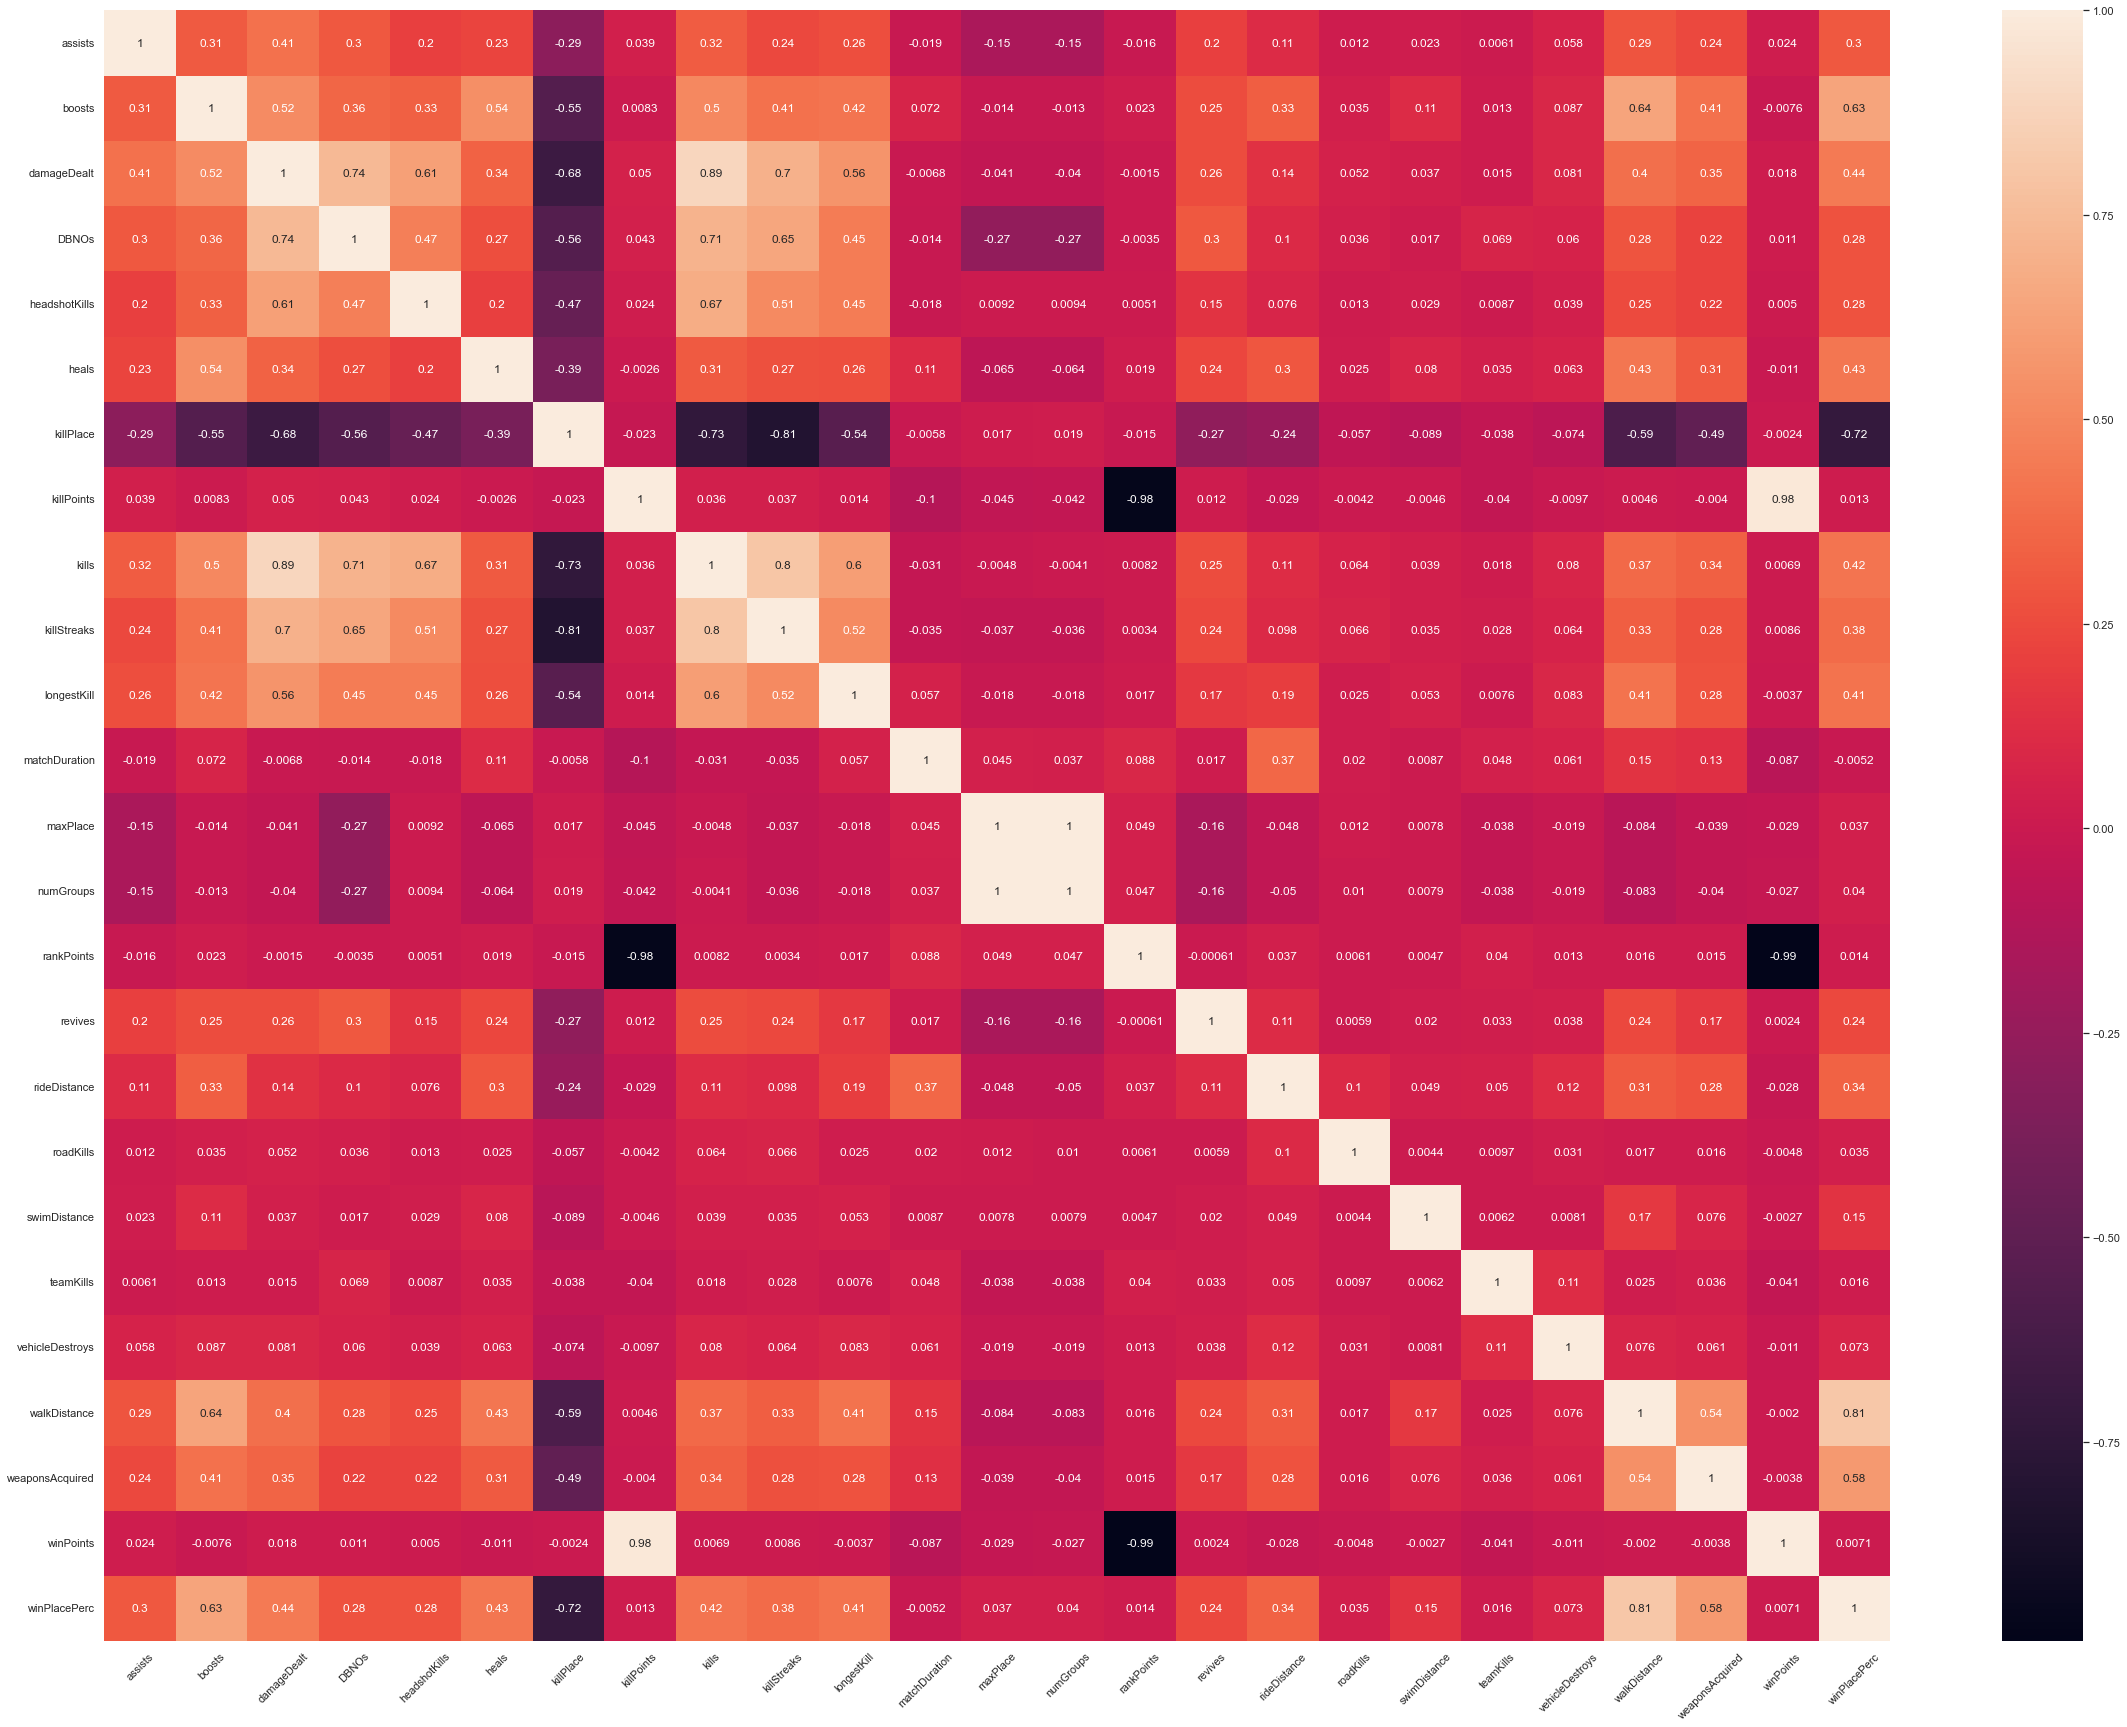

In [34]:
sns.heatmap(train.corr(), annot=True)
sns.set(rc = {'figure.figsize':(40,30)})
plt.xticks(rotation=45)
plt.show()

Heatmap 미포함 대상
'Id', 'groupId', 'matchId','matchType' 

#상관관계 Top 5
1. walkDistance : 0.810
2. boosts : 0.630
3. weaponsAcquired : 0.580
4. damageDealt : 0.440
5. heals : 0.430

In [9]:
#Outlier check

print('walkDistance')
print("최대치",train['walkDistance'].max())
print("최소치",train['walkDistance'].min())
print("평균",train['walkDistance'].mean())

walkDistance
최대치 25780.0
최소치 0.0
평균 1154.217859096256


In [10]:
train.loc[train.walkDistance > 25000,:] #핵 의심 유저 outlier

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,...,0,0.0078,0,381.9,0,0,25780.0,0,0,0.9894


497965 : 무기를 먹은 적도 없고, 킬 점수도 없으며, 다른 아웃라이어에 비해 압도적으로 이동거리만 많음

In [11]:
train.loc[train.walkDistance > 14000,:] #핵 의심 유저 _ 다른 수치와 확인

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,...,0,0.0078,0,381.90,0,0,25780.0,0,0,0.9894
1797162,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.0,0,0,0,55,...,0,0.0401,0,129.40,0,0,16250.0,3,0,0.6000
2078996,1284474083cc33,fa7e10443cc7df,c62835e88e61a6,0,2,0.0,0,0,3,48,...,0,847.7000,0,256.90,0,0,14250.0,8,0,0.8000
2238900,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.0,0,0,5,46,...,0,0.0111,0,389.50,0,0,15370.0,7,0,0.8125
2395009,d6d37216c02c17,56dd8821cacb32,f27850950d5597,0,3,273.3,0,0,1,11,...,0,1575.0000,0,59.05,0,0,15130.0,3,1583,1.0000
4259976,59b97e49800434,fe22edfa33ca11,46839812e99c0d,0,3,100.0,1,0,1,29,...,0,8904.0000,0,62.23,0,0,14100.0,5,0,0.7447


In [12]:
train.loc[train.walkDistance > 10000].sort_values(by="walkDistance", ascending=False).T

,497965,1797162,2238900,2395009,2078996,4259976,3584192,3318429,23026,3825937,...,1698123,3367058,1423847,2131738,886338,711161,1080050,34344,3963254,358281
Id,3304d0c68e27f5,7b9a750b17e9c6,861d1e5a63f3e6,d6d37216c02c17,1284474083cc33,59b97e49800434,ae28ae861424ce,25a548c95fa48f,8a6562381dd83f,40f2b3bf019c5d,...,a3609e504b8ad5,bed67795c16def,9e71dade3cb85b,54cd68af8b9e24,1df046db9cd602,865dcde2adc49d,2dd37b1cdf1038,5a591ecc957393,6e72a252b2930b,5b1f8433ec40c7
groupId,503757159d22dd,2d00192e4029c5,1da6a90addf96d,56dd8821cacb32,fa7e10443cc7df,fe22edfa33ca11,21f3aad4c2f8e6,978df298b094ba,23e638cd6eaf77,e24f1dd132c42a,...,2c062be64ade38,cb3013c5154e35,1cfb150812fbf8,7621d1a54273de,1348e288cf0149,c25e4be05c47da,db1a6c5728eacf,6717370b51c247,35a13e94e64024,41f39505dcbb0c
matchId,ce88f9c8c35bdf,6fe77402ddb0e1,16f2c51578f323,f27850950d5597,c62835e88e61a6,46839812e99c0d,c93c550676f33e,99407bcde7569c,b0a804a610e9b0,899f4f3b994091,...,106dc4da05bece,3a9f41798bb11b,22ba2eaeb4f26a,91e284e0b6c102,e0b22fe089cd5d,d7d2dd400ea559,e7d6acf956c0c2,a15d93e7165b05,296d508c50cbeb,36fd4dbb69c4fa
assists,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
boosts,0,0,1,3,2,3,2,0,1,1,...,3,2,1,5,5,4,0,3,2,1
damageDealt,0.0,0.0,0.0,273.3,0.0,100.0,310.1,0.0,0.0,40.07,...,328.3,0.0,186.7,167.7,472.2,538.3,17.51,23.22,0.0,0.0
DBNOs,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,3,0,0,0,0
headshotKills,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
heals,0,0,5,1,3,1,3,2,0,2,...,6,0,1,2,3,3,0,1,0,1
killPlace,46,55,46,11,48,29,10,39,44,41,...,8,48,24,22,23,7,53,34,63,43


In [13]:
#Outlier check
print('boosts')
print("최대치",train['boosts'].max())
print("최소치",train['boosts'].min())
print("평균",train['boosts'].mean())

boosts
최대치 33
최소치 0
평균 1.1069077209045448


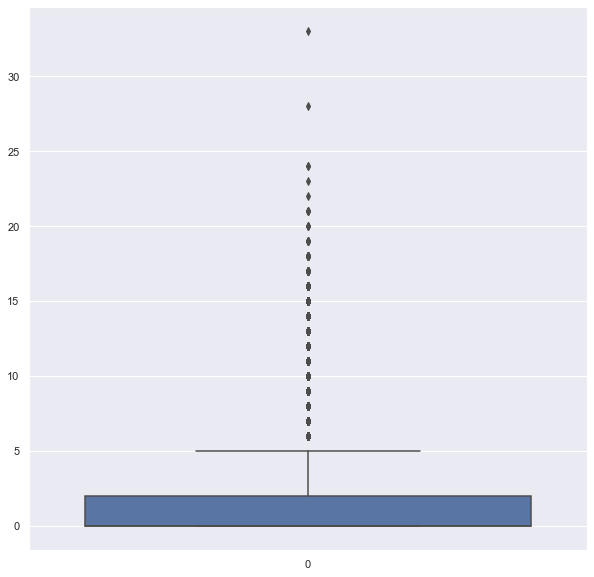

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train.boosts)
plt.show()

In [15]:
#Outlier check
print('weaponsAcquired')
print("최대치",train['weaponsAcquired'].max())
print("최소치",train['weaponsAcquired'].min())
print("평균",train['weaponsAcquired'].mean())

weaponsAcquired
최대치 236
최소치 0
평균 3.6604876223474614


In [16]:
train.loc[train.weaponsAcquired > 200,:] #핵 의심 유저 outlier

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2982525,3f2bcf53b108c4,2dbc013e849f5a,1df2560f0937ab,0,1,85.85,0,0,2,55,...,0,4778.0,0,0.0,0,0,2112.0,236,1553,0.6786


In [17]:
train.loc[train.weaponsAcquired > 100,:] #핵 의심 유저 outlier

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0,1880.0,0,0.00,0,0,1307.0,128,1577,0.7111
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0,2852.0,0,47.21,0,0,2400.0,102,0,0.8929
2743408,afcb46681b909f,3715298b7eea9c,4dd4d42772464f,0,4,186.90,2,0,2,18,...,0,1675.0,0,0.00,1,0,1643.0,167,1452,0.7955
2749693,940b52bf12805a,4757d102ca4fbf,7ecae2cedc064f,1,3,378.90,2,0,5,7,...,0,303.7,0,0.00,0,0,3338.0,177,1711,0.8846
2797867,da68d2812229a8,536975608768ed,fbbdc018f4b771,0,0,0.00,0,0,0,58,...,0,0.0,0,0.00,0,0,1235.0,153,0,0.5464
2982525,3f2bcf53b108c4,2dbc013e849f5a,1df2560f0937ab,0,1,85.85,0,0,2,55,...,0,4778.0,0,0.00,0,0,2112.0,236,1553,0.6786


In [18]:
train.loc[train.weaponsAcquired > 90,:] #핵 의심 유저 outlier

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0,1880.0,0,0.00,0,0,1307.0,128,1577,0.7111
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0,2852.0,0,47.21,0,0,2400.0,102,0,0.8929
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0,0.0,0,0.00,0,0,653.1,95,0,0.5600
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0,1908.0,0,0.00,0,0,980.8,94,0,0.2000
1834515,e927e9020f7e0d,60d6b714a7308f,8e265af296007b,1,1,26.46,0,0,1,51,...,1,0.0,0,0.00,0,0,2835.0,96,0,0.9200
2373240,a8c150d5d3d3e2,6e1c8c5f91e060,f900de1ec39fa5,12,0,1746.00,0,1,1,11,...,0,0.0,0,0.00,0,0,275.9,96,0,0.0000
2442962,438cabaa5dfbdd,596c155c524725,8e0bbeec19a929,0,0,0.00,0,0,0,56,...,0,0.0,0,0.00,0,0,807.6,95,0,0.5000
2743408,afcb46681b909f,3715298b7eea9c,4dd4d42772464f,0,4,186.90,2,0,2,18,...,0,1675.0,0,0.00,1,0,1643.0,167,1452,0.7955
2749693,940b52bf12805a,4757d102ca4fbf,7ecae2cedc064f,1,3,378.90,2,0,5,7,...,0,303.7,0,0.00,0,0,3338.0,177,1711,0.8846
2797867,da68d2812229a8,536975608768ed,fbbdc018f4b771,0,0,0.00,0,0,0,58,...,0,0.0,0,0.00,0,0,1235.0,153,0,0.5464


In [19]:
#Outlier check
print('damageDealt')
print("최대치",train['damageDealt'].max())
print("최소치",train['damageDealt'].min())
print("평균",train['damageDealt'].mean())

damageDealt
최대치 6616.0
최소치 0.0
평균 130.71713789848874


In [61]:
train.loc[train.damageDealt > 6000,:]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,0.0,0,0,1036.0,60,0,1.0,Normal,fpp
1248348,80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,...,0,0.0,0,0,1740.0,23,0,1.0,Normal,fpp


In [20]:
#Outlier check 
print('heals')
print("최대치",train['heals'].max())
print("최소치",train['heals'].min())
print("평균",train['heals'].mean())

heals
최대치 80
최소치 0
평균 1.370147196987789


In [63]:
train.loc[train.heals > 60,:]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
700615,512ca0f7c6729b,de2c3988154e5e,03a24daa0f3e65,0,3,0.000,3,0,61,48,...,0,0.0,1,0,963.8,2,0,0.6364,Rank,tpp
996709,6737eed1cf8dfc,12cc81f7d2eb4d,5f9a59a3ef190d,0,6,1.824,0,0,63,37,...,0,0.0,0,0,1752.0,4,1516,0.8481,Rank,fpp
3419345,4d6c412604232f,ff7daf14a68de4,fea1354b6e5089,1,8,146.700,0,0,61,30,...,0,0.0,0,0,1762.0,6,1620,0.8409,Rank,tpp
3476343,1ac3c7d24475c8,ea7008368b4c5d,fcc78beee326e3,1,4,207.200,0,0,73,26,...,0,0.0,0,0,3078.0,4,0,0.8889,Rank,fpp
4262662,3be1ded892f443,5c6c4e66418c25,ce09de37cf3f5a,0,1,230.000,5,0,80,41,...,0,0.0,0,0,932.7,4,1527,0.7600,Rank,tpp
4397805,703ce5805efed7,b84c7dd65f03cd,d8fa2223c98979,0,1,44.510,0,0,62,44,...,0,0.0,0,0,2629.0,6,0,0.8367,Rank,tpp


In [21]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [22]:
test.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

In [23]:
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [24]:
train['winPoints'].min()

0

In [65]:
print('matchDuration')
print("최대치",train['matchDuration'].max())
print("최소치",train['matchDuration'].min())
print("평균",train['matchDuration'].mean())

matchDuration
최대치 2237
최소치 9
평균 1579.5064396714524


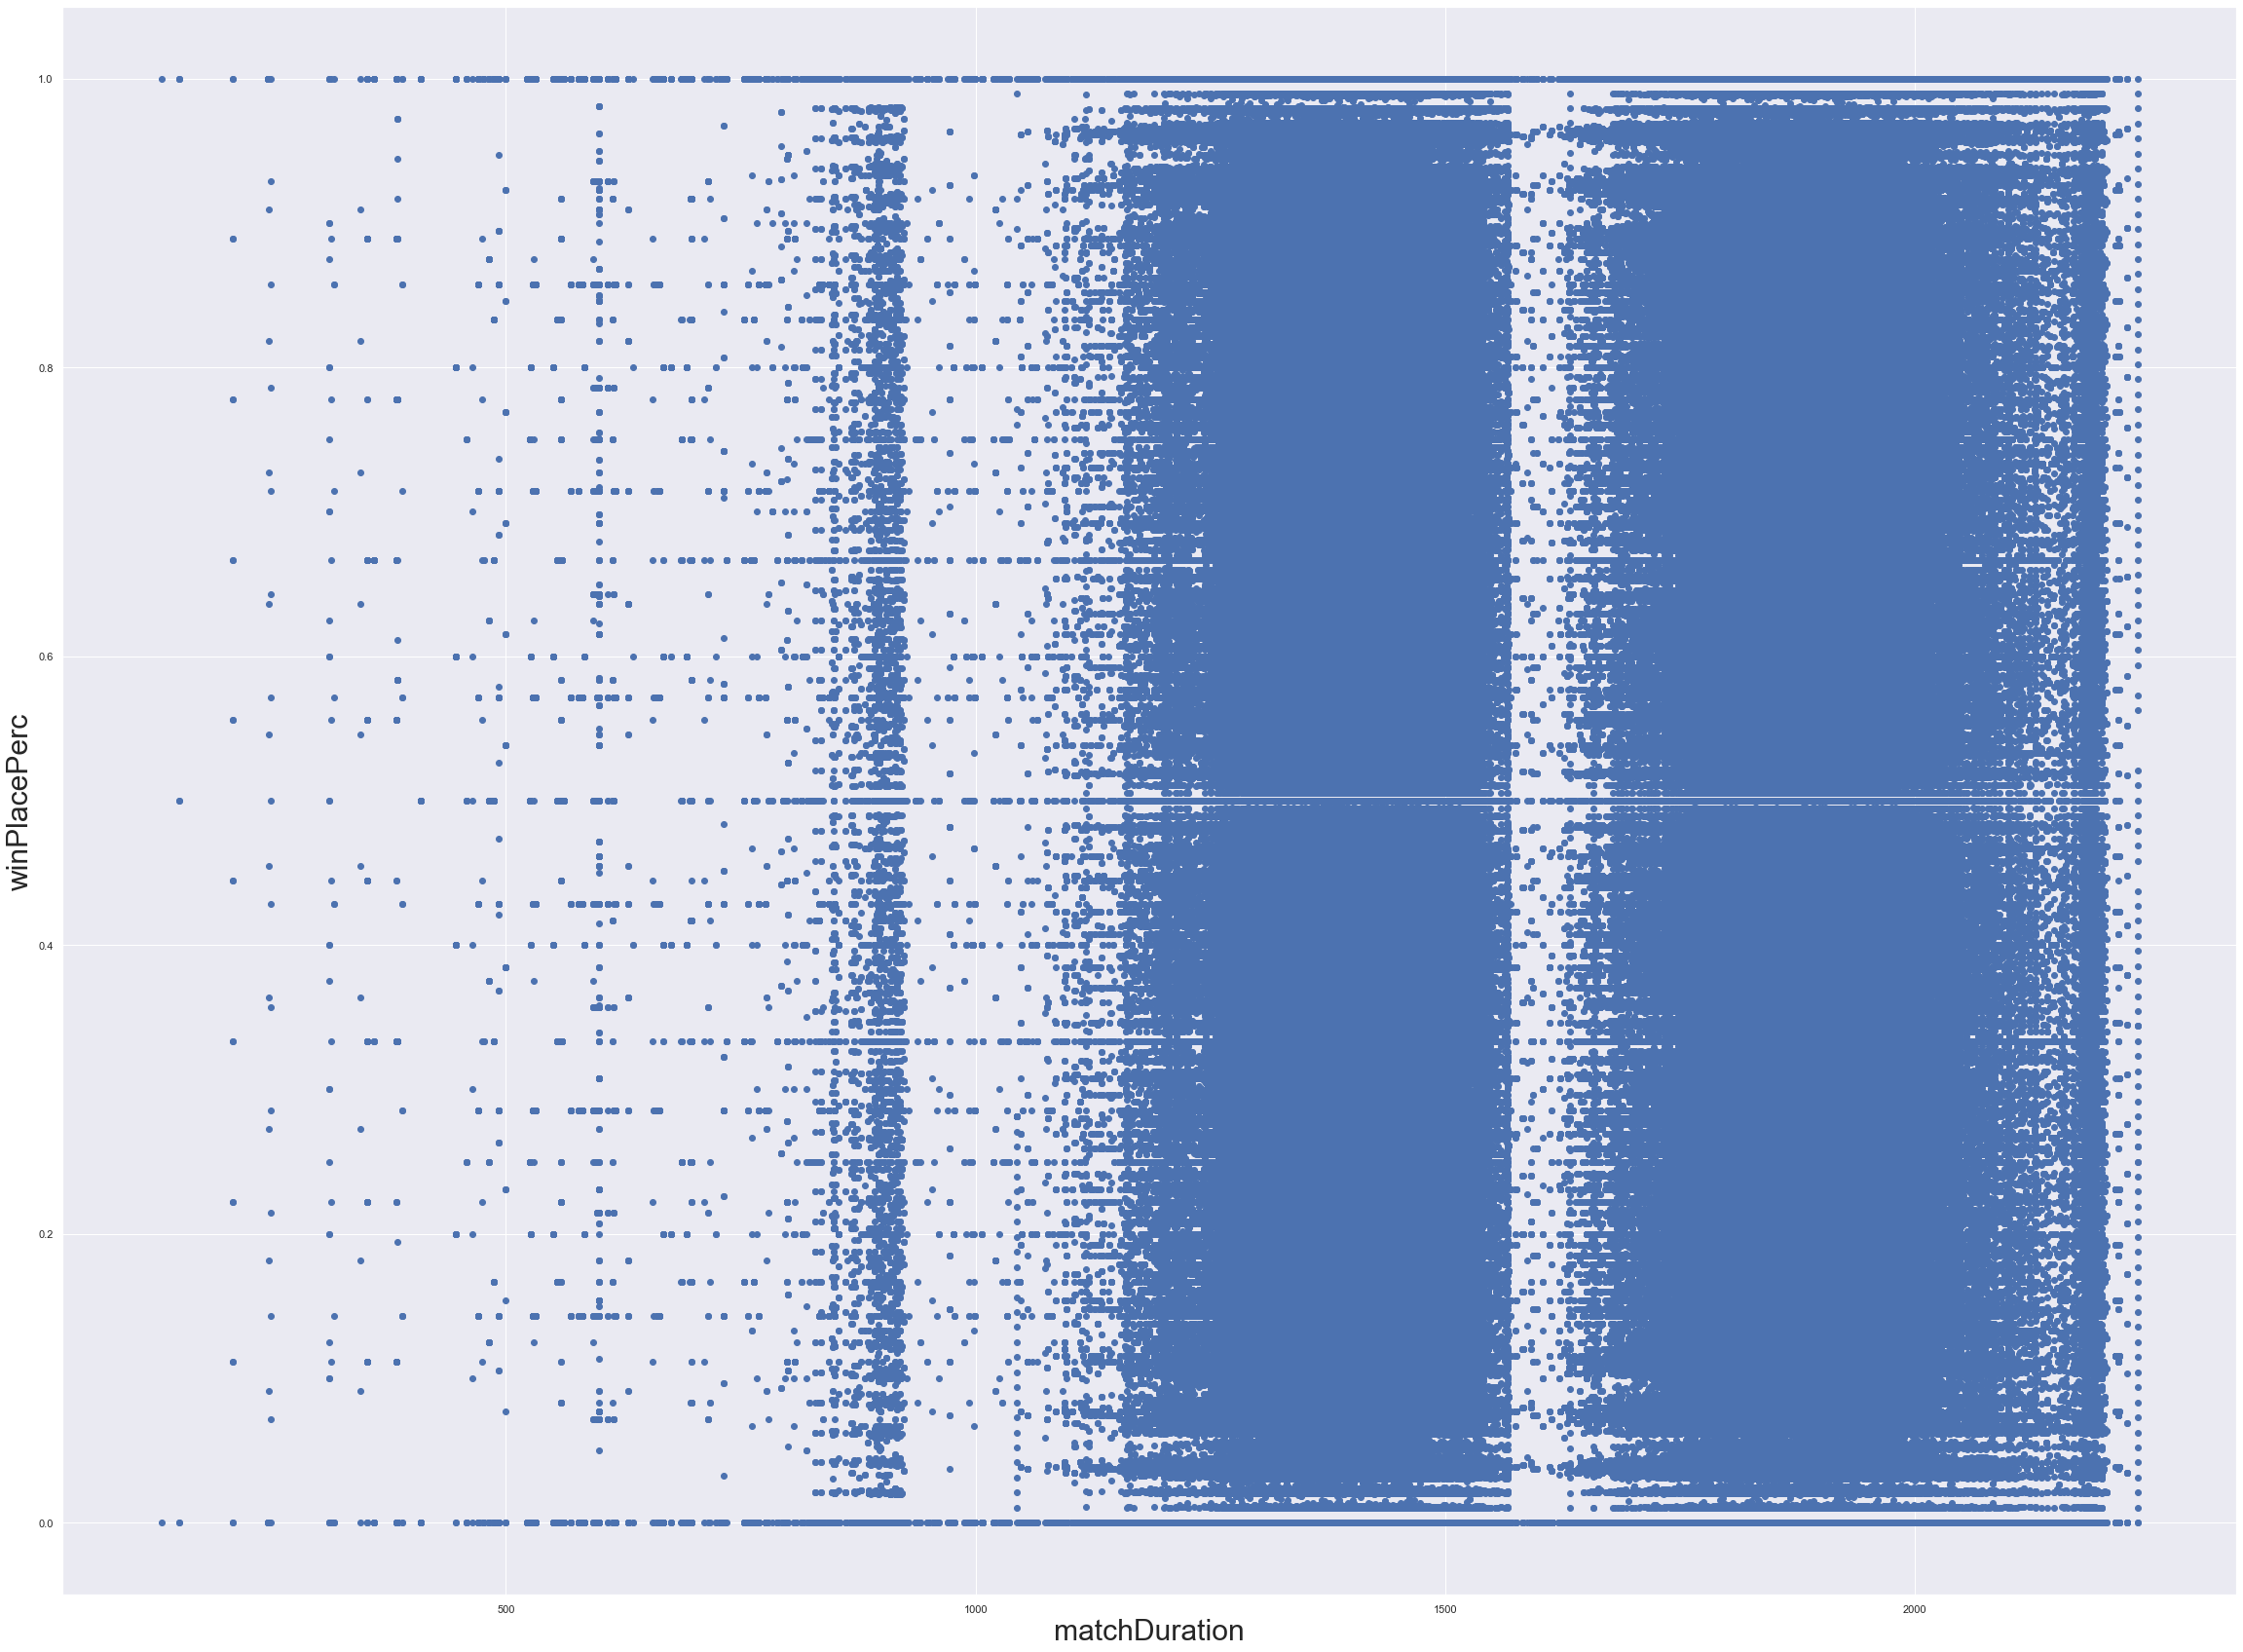

In [81]:

x = train['matchDuration']
y = train['winPlacePerc']
plt.xlabel('matchDuration',fontsize=30)
plt.ylabel('winPlacePerc',fontsize=30)
plt.scatter(x,y) #자기장 압박감에 따른 교전 밀집도 확인?

In [68]:
train.loc[2744604] #9초컷 당한 친구가 알고보니 nan값 (삭제)

Id                 f70c74418bb064
groupId            12dfbede33f92b
matchId            224a123c53e008
assists                         0
boosts                          0
damageDealt                   0.0
DBNOs                           0
headshotKills                   0
heals                           0
killPlace                       1
killPoints                      0
kills                           0
killStreaks                     0
longestKill                   0.0
matchDuration                   9
matchType                solo-fpp
maxPlace                        1
numGroups                       1
rankPoints                   1574
revives                         0
rideDistance                  0.0
roadKills                       0
swimDistance                  0.0
teamKills                       0
vehicleDestroys                 0
walkDistance                  0.0
weaponsAcquired                 0
winPoints                       0
winPlacePerc                  NaN
UPPER_matchTyp

# Drop Check

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [26]:
df = train.copy()
df['Id'].value_counts(ascending=False) # ID Drop 가능

7f96b2f878858a    1
d19659ceb5b553    1
b587ef96cf8d87    1
66715fcb3b871d    1
59e0d2fdd292a8    1
                 ..
0f3c9b54ce4173    1
9a91d96d201b22    1
a92d0949e8830e    1
f1d8ef55f70584    1
0d8e7ed728b6fd    1
Name: Id, Length: 4446966, dtype: int64

In [27]:
df['groupId'].value_counts(ascending=False)

14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026745, dtype: int64

In [48]:
df[df['matchType']=='squad-fpp']

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [28]:
df['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [29]:
df = df.drop(index=497965) #핵쟁이 아웃

In [30]:
df = df.drop(['Id', 'rankPoints', 'matchDuration'], axis=1)
df = df.drop(index=2744604)
df
#test_temp2 = test_temp.drop(["index", "SEND_SPG_INNB", "REC_SPG_INNB", "last_three_SEND", "last_three_REC"], axis=1)

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


winPoints : ELO Drop
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

## rankPoints,killPoints, winPoints는 유저의 전적 -> 위 게임 순위에 직접적으로 영향을 주는 요소는 아님 . drop할지는 현재 상의 중

Index(['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired',
       'damageDealt', 'heals'],
      dtype='object')

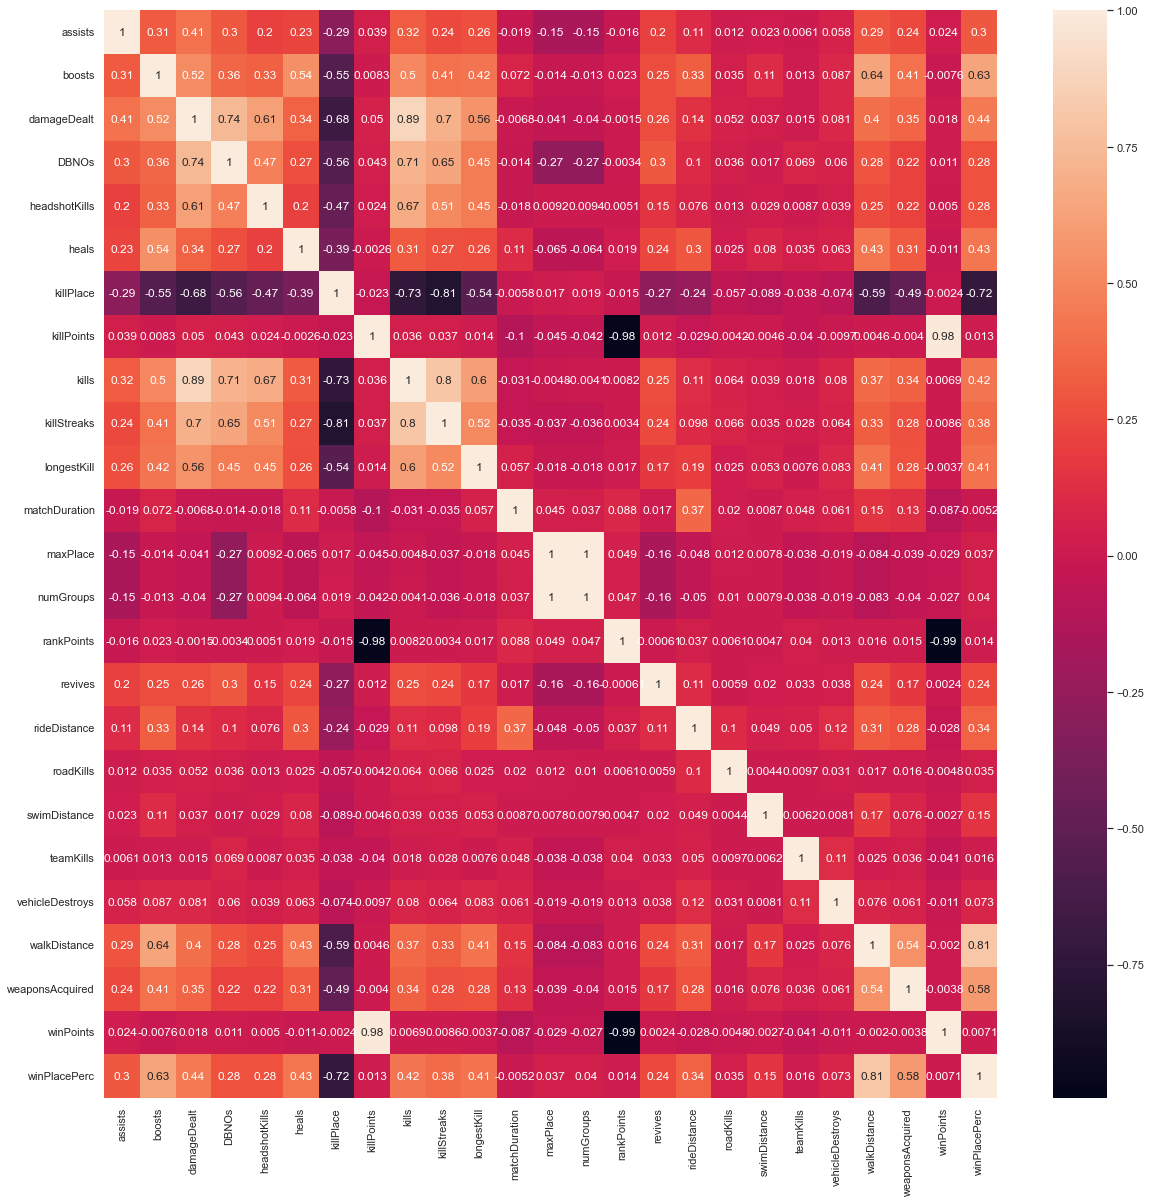

In [31]:
# rankPoint -1을 0로 변환 후 상관관계 분석

temp = train.copy()

temp["rankPoints"] = train.loc[:, "rankPoints"].replace(-1, 0)

plt.figure(figsize=(20, 20))
sns.heatmap(temp.corr(), annot=True)
big_five = temp.corr().nlargest(6, 'winPlacePerc')['winPlacePerc'].index
big_five

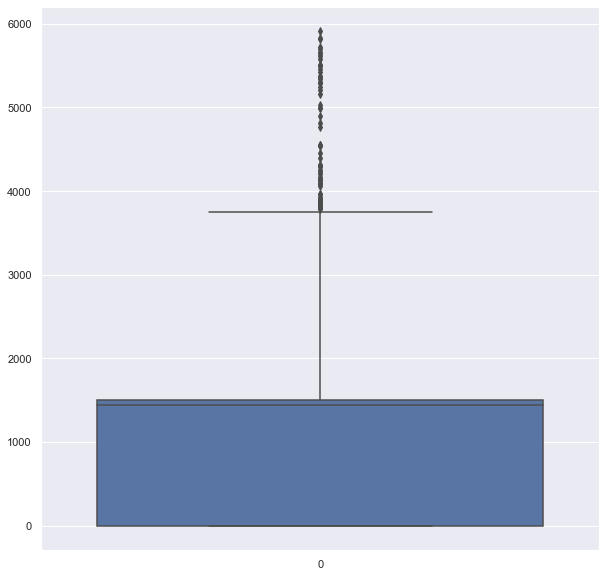

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train.rankPoints)
plt.show()

In [33]:
train.loc[train.rankPoints > 5800,:].T #RankPoint가 높다고해서 꼭 승률이 높다고는 안 봄 (게임을 던졌을 수도)

,1046051,3882041,3958425
Id,97bdb8a2f4577d,d3c3dcab70b1a9,45ff6d5dc8c6d6
groupId,e1f354ef1ac2db,d75282106802f1,97886b770704e8
matchId,e7639206c0c346,637d0c31bf47b1,8a8c875c4d32e0
assists,0,0,0
boosts,2,0,1
damageDealt,0.0,68.8,74.74
DBNOs,0,1,0
headshotKills,0,0,0
heals,1,0,0
killPlace,76,45,81


In [35]:
# 0 rows × 26 columns
train[(train.rankPoints == -1) & (train.winPoints == 0)]
# 2655646 rows × 26 columns
train[(train.rankPoints != -1) & (train.winPoints == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.000,0,0,34.70,1,0,0.0370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4000,0,0.000,0,0,845.60,3,0,0.2414
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
## matchtype을 랭크, 노말, 이벤트로 나누기 랭크

def UPPER_matchType(x):
    if x == 'squad-fpp' or x == 'duo' or x == 'solo-fpp'or x == 'squad' or x == 'duo-fpp' or x=='solo':
        return 'Rank'

    elif x == 'normal-solo-fpp' or x == 'normal-duo-fpp' or x == 'normal-squad-fpp' or x == 'normal-duo' or x == 'normal-squad' or x == 'normal-solo':
        return 'Normal'

    else:
        return 'Event'

train['UPPER_matchType'] = train['matchType'].map(UPPER_matchType)

In [5]:
def fpp_tpp(x):
    if x == 'squad-fpp' or x == 'normal-squad-fpp' or x== 'normal-solo-fpp' or x == 'solo-fpp' or x == 'duo-fpp' or x == 'normal-duo-fpp'or x == 'crashfpp' or x == 'flarefpp':
        return 'fpp'

    elif x == 'duo'  or x == 'normal-duo' or x == 'normal-squad' or x == 'normal-solo' or x == 'squad'  or x=='solo' or x == 'crashtpp' or x == 'flaretpp':
        return 'tpp'

train['fpp_tpp'] = train['matchType'].map(fpp_tpp)
train.fpp_tpp.value_counts()

fpp    3320989
tpp    1125977
Name: fpp_tpp, dtype: int64

In [53]:
fpp = train[train['fpp_tpp']=='fpp']

print('FPP 승률')
print("최대치",fpp['winPlacePerc'].max())
print("최소치",fpp['winPlacePerc'].min())
print("평균",fpp['winPlacePerc'].mean())

FPP 승률
최대치 1.0
최소치 0.0
평균 0.47578079863581946


In [54]:
tpp = train[train['fpp_tpp']=='tpp']

print('FPP 승률')
print("최대치",tpp['winPlacePerc'].max())
print("최소치",tpp['winPlacePerc'].min())
print("평균",tpp['winPlacePerc'].mean())

FPP 승률
최대치 1.0
최소치 0.0
평균 0.4640934702041328


In [59]:
#winPlacePerc = 이긴 사람들

winner = train.loc[train.winPlacePerc == 1,:]
winner

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,1,5,378.80,2,3,6,4,...,0,0.00,0,1,3120.0,4,0,1.0,Rank,fpp
107,7970b4ea89e81e,abf9e2780b9f48,04832cfd74ff30,1,1,58.36,0,0,2,38,...,0,0.00,0,0,2708.0,7,0,1.0,Rank,tpp
118,953577684b828a,54ce33c41ef9ff,c5d412db6dbee4,2,6,76.11,0,0,12,45,...,0,0.00,0,0,2635.0,7,0,1.0,Rank,fpp
123,174c758156bcf3,a935604c9bb7aa,edc87c8d445823,1,9,626.20,4,3,2,4,...,0,0.00,0,0,2814.0,7,1566,1.0,Rank,fpp
186,eb7a3e9f50eca5,fe3d74f737cd10,92338c2233be1a,0,5,778.00,0,3,2,2,...,0,0.00,0,0,2422.0,5,1506,1.0,Rank,fpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446846,7fa83fe797d3c9,2b3e8b4c88730e,841d12ab0cf4c0,0,3,567.60,0,2,1,1,...,0,92.31,0,0,3103.0,4,1500,1.0,Normal,fpp
4446851,94821d018a4c96,de5a790796b4e9,56c24019494299,1,6,886.30,5,2,3,2,...,0,0.00,0,0,3857.0,11,0,1.0,Rank,fpp
4446878,b4a03144c7f292,af465c2d950f4b,32eb0143ac4c6f,0,2,100.00,1,0,1,20,...,0,0.00,0,0,2416.0,5,0,1.0,Rank,fpp
4446896,150f2e129ede6b,4417126d5b0d71,8dddf0ace87e54,0,5,129.40,1,0,0,13,...,0,0.00,0,0,3320.0,3,0,1.0,Rank,fpp


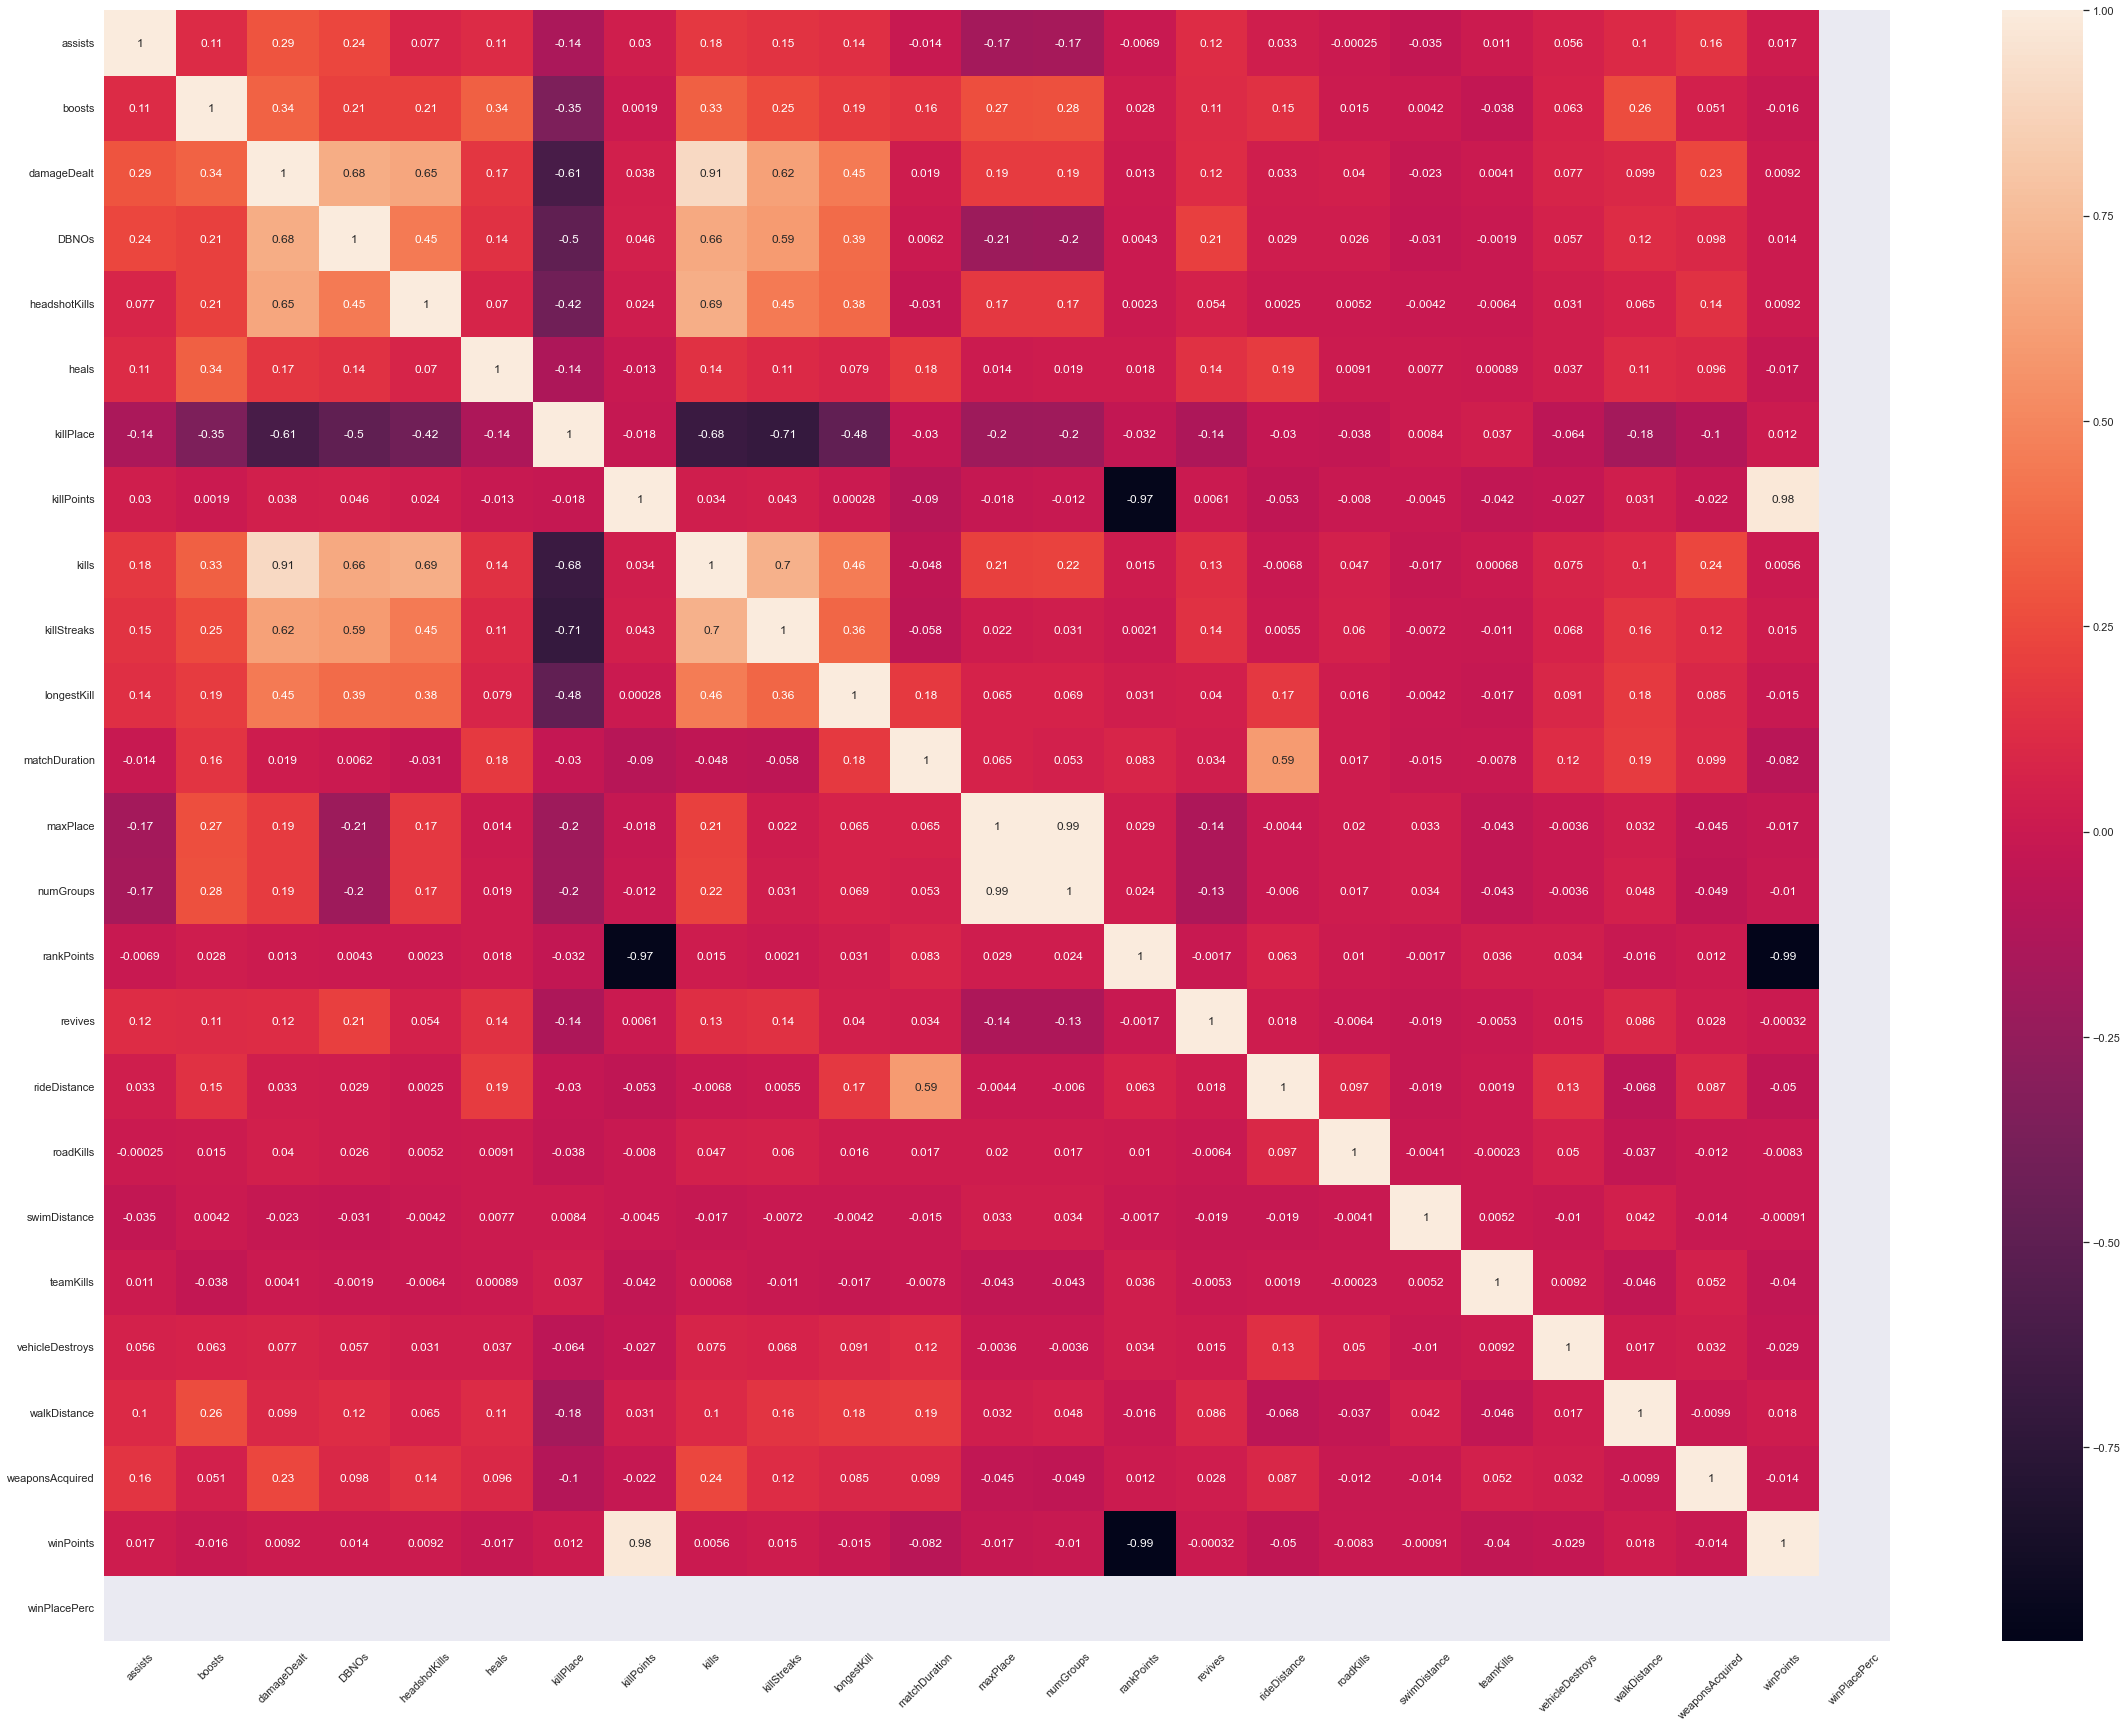

In [60]:
sns.heatmap(winner.corr(), annot=True)
sns.set(rc = {'figure.figsize':(40,30)})
plt.xticks(rotation=45)
plt.show()

전체 기준 데이터 Top5랑 비교

walkDistance : 0.810
boosts : 0.630
weaponsAcquired : 0.580
damageDealt : 0.440
heals : 0.430

In [91]:
print('Winner - walkDistance')
print("최대치",winner['walkDistance'].max())
print("최소치",winner['walkDistance'].min())
print("평균",winner['walkDistance'].mean())

Winner - walkDistance
최대치 15130.0
최소치 0.0
평균 2965.1160321917537


In [90]:
print('Winner - boosts')
print("최대치",winner['boosts'].max())
print("최소치",winner['boosts'].min())
print("평균",winner['boosts'].mean())

Winner - boosts
최대치 21
최소치 0
평균 3.8775524601600653


In [89]:
print('Winner - weaponsAcquired')
print("최대치",winner['weaponsAcquired'].max())
print("최소치",winner['weaponsAcquired'].min())
print("평균",winner['weaponsAcquired'].mean())

Winner - weaponsAcquired
최대치 85
최소치 0
평균 5.681366746882177


In [88]:
print('Winner - damageDealt')
print("최대치",winner['damageDealt'].max())
print("최소치",winner['damageDealt'].min())
print("평균",winner['damageDealt'].mean())

Winner - damageDealt
최대치 6616.0
최소치 0.0
평균 414.92501493105726


In [87]:
print('Winner - heals')
print("최대치",winner['heals'].max())
print("최소치",winner['heals'].min())
print("평균",winner['heals'].mean())

Winner - heals
최대치 54
최소치 0
평균 3.4268066126845023


In [94]:
winner['numGroups'].value_counts()

27    20006
28    17809
26    15832
29    11275
25     9362
      ...  
69        2
66        1
55        1
62        1
57        1
Name: numGroups, Length: 99, dtype: int64

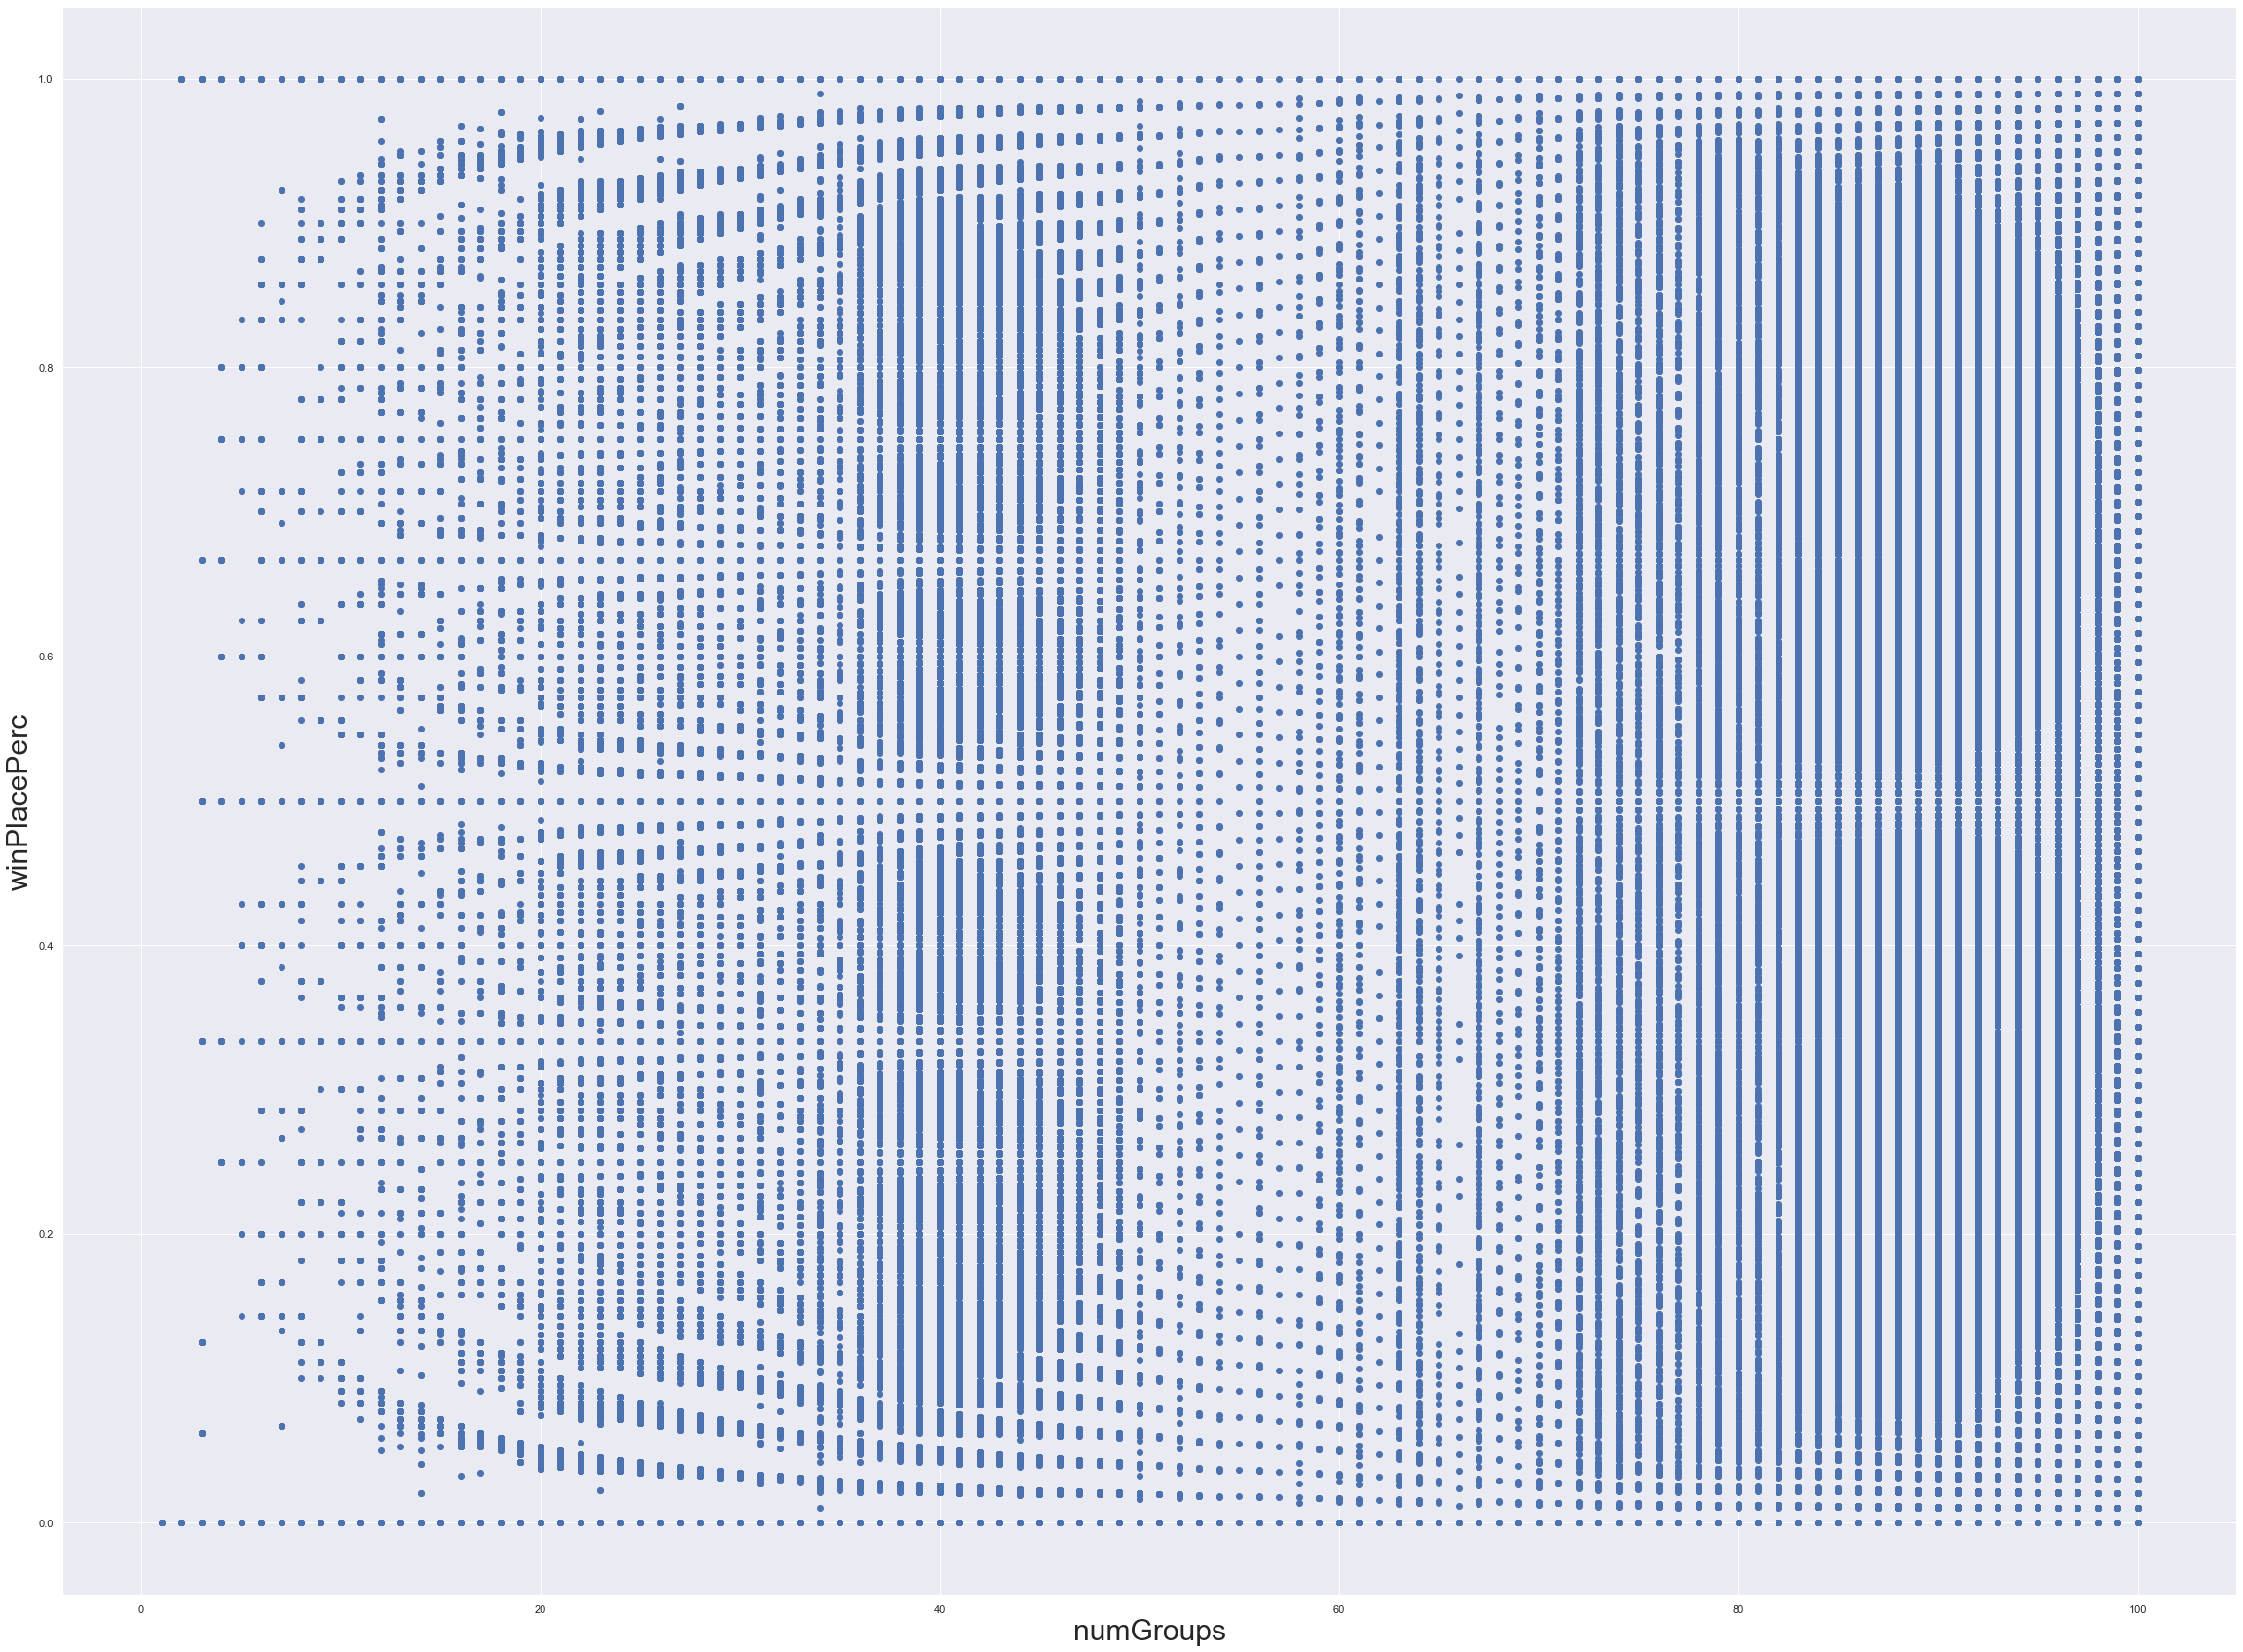

In [95]:
x = train['numGroups']
y = train['winPlacePerc']
plt.xlabel('numGroups',fontsize=30)
plt.ylabel('winPlacePerc',fontsize=30)
plt.scatter(x,y) #

In [100]:
train.loc[train.heals > 70,:]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
3476343,1ac3c7d24475c8,ea7008368b4c5d,fcc78beee326e3,1,4,207.2,0,0,73,26,...,0,0.0,0,0,3078.0,4,0,0.8889,Rank,fpp
4262662,3be1ded892f443,5c6c4e66418c25,ce09de37cf3f5a,0,1,230.0,5,0,80,41,...,0,0.0,0,0,932.7,4,1527,0.7600,Rank,tpp


In [102]:
train['numGroups'].value_counts()

27    537607
28    488669
26    416744
29    314665
47    269503
       ...  
54       112
66        85
62        64
57        58
55        56
Name: numGroups, Length: 100, dtype: int64

In [103]:
print('numGroups')
print("최대치",winner['numGroups'].max())
print("최소치",winner['numGroups'].min())
print("평균",winner['numGroups'].mean())

numGroups
최대치 100
최소치 2
평균 34.45619370870012


In [6]:
numG = train.loc[train.numGroups < 10,:] 
#tpp = train.loc[train.fpp_tpp == 'tpp',:]

numG[numG['fpp_tpp']=='tpp']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
846,0df7c355497d77,325464bcf4c846,f3a64f99badeca,0,0,0.0,0,0,0,5,...,0,0.0,0,0,0.00,6,0,0.0,Rank,tpp
1357,72f70c6c074ca9,da042db555b932,f3c5fa51aacb95,0,0,722.8,0,0,0,5,...,0,0.0,0,0,0.00,15,0,0.0,Rank,tpp
2640,62f59fc192169d,9151ba6ff83a5a,827e75036742f3,0,0,291.5,0,0,0,7,...,0,0.0,0,0,0.00,2,0,0.0,Rank,tpp
2769,89120d2f4e44e0,fa54efeb11b8a6,662c9c7f9e87d0,4,0,970.5,6,4,17,4,...,0,0.0,0,0,90.79,28,1500,1.0,Normal,tpp
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0,0,0,0,1,...,0,0.0,0,0,0.00,3,0,1.0,Rank,tpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443223,6cbce4b0ce6217,9d010232fd5264,2c7ee565a600c6,0,0,0.0,0,0,0,15,...,0,0.0,0,0,0.00,1,0,0.0,Rank,tpp
4443248,120b7d2d32663f,b70109a45eb127,6db87452a2db21,0,0,0.0,0,0,0,2,...,0,0.0,0,0,0.00,3,0,1.0,Rank,tpp
4445068,9450fc9e3a53de,a77d70a6de206d,70357848de1236,0,0,166.1,0,0,0,12,...,0,0.0,0,0,0.00,3,0,0.0,Rank,tpp
4446093,2f57d1e882cc06,1c59e2133a2fbd,0027b1ffb2e346,0,0,116.8,0,0,0,3,...,0,0.0,0,0,0.00,11,0,1.0,Rank,tpp


In [13]:
stg = numG[numG['winPlacePerc']==1]
stg

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
2769,89120d2f4e44e0,fa54efeb11b8a6,662c9c7f9e87d0,4,0,970.5000,6,4,17,4,...,0,0.0,0,0,90.79,28,1500,1.0,Normal,tpp
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0000,0,0,0,1,...,0,0.0,0,0,0.00,3,0,1.0,Rank,tpp
8790,106afdb574db25,4b0ae4659e9936,cf0cb51c829eb5,0,0,0.0000,0,0,0,2,...,0,0.0,0,0,0.00,1,0,1.0,Rank,tpp
9264,0351565a7058e9,3663a93a319725,3659fe3694262a,0,0,0.3218,0,0,0,1,...,0,0.0,0,0,0.00,9,0,1.0,Rank,tpp
12179,5c7f42c36e8d42,a18a0f57a04a4d,d104cda602415a,1,1,118.8000,0,0,5,12,...,0,0.0,0,0,3889.00,7,1586,1.0,Rank,fpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440136,c6cbd9c1af4296,2cbf7ff51bd838,a20eb097c8d8a6,5,0,1027.0000,10,2,0,13,...,0,0.0,0,0,528.70,23,0,1.0,Normal,fpp
4442804,1f2fc5f315b80a,f84b7639c369c7,9c8962b58bb3e3,2,0,262.9000,0,0,0,47,...,0,0.0,0,0,581.70,20,1500,1.0,Normal,fpp
4443248,120b7d2d32663f,b70109a45eb127,6db87452a2db21,0,0,0.0000,0,0,0,2,...,0,0.0,0,0,0.00,3,0,1.0,Rank,tpp
4446093,2f57d1e882cc06,1c59e2133a2fbd,0027b1ffb2e346,0,0,116.8000,0,0,0,3,...,0,0.0,0,0,0.00,11,0,1.0,Rank,tpp


In [24]:
a = stg[stg['walkDistance'] < 1000]
a

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
2769,89120d2f4e44e0,fa54efeb11b8a6,662c9c7f9e87d0,4,0,970.5000,6,4,17,4,...,0,0.0,0,0,90.79,28,1500,1.0,Normal,tpp
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0000,0,0,0,1,...,0,0.0,0,0,0.00,3,0,1.0,Rank,tpp
8790,106afdb574db25,4b0ae4659e9936,cf0cb51c829eb5,0,0,0.0000,0,0,0,2,...,0,0.0,0,0,0.00,1,0,1.0,Rank,tpp
9264,0351565a7058e9,3663a93a319725,3659fe3694262a,0,0,0.3218,0,0,0,1,...,0,0.0,0,0,0.00,9,0,1.0,Rank,tpp
17103,88d1092990ea64,a3b7c153bebdda,6abae63f2c8cd9,0,0,0.0000,0,0,0,46,...,0,0.0,0,0,57.70,2,1500,1.0,Normal,fpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440136,c6cbd9c1af4296,2cbf7ff51bd838,a20eb097c8d8a6,5,0,1027.0000,10,2,0,13,...,0,0.0,0,0,528.70,23,0,1.0,Normal,fpp
4442804,1f2fc5f315b80a,f84b7639c369c7,9c8962b58bb3e3,2,0,262.9000,0,0,0,47,...,0,0.0,0,0,581.70,20,1500,1.0,Normal,fpp
4443248,120b7d2d32663f,b70109a45eb127,6db87452a2db21,0,0,0.0000,0,0,0,2,...,0,0.0,0,0,0.00,3,0,1.0,Rank,tpp
4446093,2f57d1e882cc06,1c59e2133a2fbd,0027b1ffb2e346,0,0,116.8000,0,0,0,3,...,0,0.0,0,0,0.00,11,0,1.0,Rank,tpp


In [27]:
train['groupId'].value_counts()



14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026745, dtype: int64

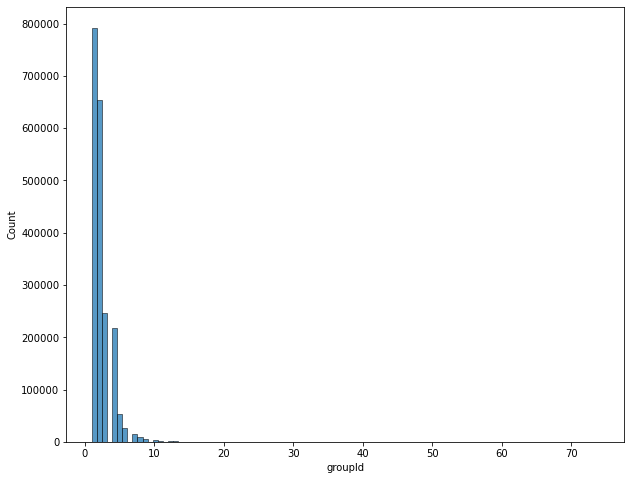

In [66]:
data2 = train.groupId.value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data = data2, bins=100)
plt.show() 

In [46]:
train[train['groupId']=='5941df37c809be']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
1772696,ea1d9442dbb3e3,5941df37c809be,b5da2e7bb438fc,0,3,356.5,0,0,11,7,...,0,0.0,0,0,2875.0,8,0,0.9158,Rank,tpp


In [48]:
game96 = train[train['matchId']=='b5da2e7bb438fc']

In [53]:
game96['groupId'].value_counts()

56b326f28d18fa    2
b2e05f76e0d4d4    2
87e91dd7d4fffd    2
6e898c5fb00a39    1
d2c5b8831259a6    1
                 ..
e7a833b1053a6e    1
bd29a5fd3b6a7a    1
f6867c8e4b21c1    1
55737626601ef5    1
42e64c73108f6d    1
Name: groupId, Length: 93, dtype: int64

In [60]:
game96[game96['Id']=='56b326f28d18fa']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp


In [54]:
game96['matchType']

195        solo
29552      solo
107908     solo
128380     solo
156780     solo
           ... 
4237419    solo
4306572    solo
4323174    solo
4356303    solo
4389952    solo
Name: matchType, Length: 96, dtype: object

In [40]:
y = train[train['matchId']=='b30f3d87189aa6']
z = train[train['groupId']=='14d6b54cdec6bc']
y

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,UPPER_matchType,fpp_tpp
51361,993cf1860ef998,14d6b54cdec6bc,b30f3d87189aa6,0,0,100.00,1,0,0,36,...,0,0.0,0,0,129.3,2,0,0.0,Normal,fpp
87328,951585445b1a5e,14d6b54cdec6bc,b30f3d87189aa6,0,0,0.00,0,0,0,79,...,0,0.0,0,0,558.4,4,0,0.0,Normal,fpp
130067,fea1ba100257c6,14d6b54cdec6bc,b30f3d87189aa6,3,1,172.60,0,0,5,74,...,0,0.0,0,0,719.5,3,0,0.0,Normal,fpp
205499,1fdda14a234636,14d6b54cdec6bc,b30f3d87189aa6,0,0,100.00,1,0,0,30,...,0,0.0,0,0,2640.0,10,0,0.0,Normal,fpp
214626,83d52b34e255c8,14d6b54cdec6bc,b30f3d87189aa6,0,1,91.27,0,0,0,45,...,0,0.0,0,0,2428.0,7,0,0.0,Normal,fpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173293,5db2a480ca1520,14d6b54cdec6bc,b30f3d87189aa6,0,3,83.61,0,0,0,46,...,0,0.0,0,0,2361.0,7,0,0.0,Normal,fpp
4179298,1555194ae41687,14d6b54cdec6bc,b30f3d87189aa6,0,0,0.00,0,0,0,52,...,0,0.0,0,0,1103.0,4,0,0.0,Normal,fpp
4352240,10214df6bd9a41,14d6b54cdec6bc,b30f3d87189aa6,1,1,222.70,1,0,0,56,...,0,0.0,0,0,3057.0,7,0,0.0,Normal,fpp
4364394,c01432e5ac6612,0aef53445f8793,b30f3d87189aa6,2,3,586.40,3,0,4,5,...,0,0.0,0,0,3229.0,12,0,1.0,Normal,fpp


In [42]:
y['groupId'].unique()

array(['14d6b54cdec6bc', '0aef53445f8793'], dtype=object)

In [ ]:
y

In [45]:
y[y['Id']=='c01432e5ac6612'].T

,4364394
Id,c01432e5ac6612
groupId,0aef53445f8793
matchId,b30f3d87189aa6
assists,2
boosts,3
damageDealt,586.4
DBNOs,3
headshotKills,0
heals,4
killPlace,5


In [38]:
y['matchType']

51361      normal-squad-fpp
87328      normal-squad-fpp
130067     normal-squad-fpp
205499     normal-squad-fpp
214626     normal-squad-fpp
                 ...       
4173293    normal-squad-fpp
4179298    normal-squad-fpp
4352240    normal-squad-fpp
4364394    normal-squad-fpp
4444523    normal-squad-fpp
Name: matchType, Length: 89, dtype: object

In [41]:
z['matchType']

51361      normal-squad-fpp
87328      normal-squad-fpp
130067     normal-squad-fpp
205499     normal-squad-fpp
214626     normal-squad-fpp
                 ...       
4110904    normal-squad-fpp
4173293    normal-squad-fpp
4179298    normal-squad-fpp
4352240    normal-squad-fpp
4444523    normal-squad-fpp
Name: matchType, Length: 74, dtype: object

In [36]:
y['maxPlace'].value_counts()

2    74
Name: maxPlace, dtype: int64

In [28]:
train['matchId'].value_counts()

4b5db40aec4797    100
b10e8738adafb9    100
bc28c54250342d    100
c2db47653f79b7    100
79e05d7908e0ca    100
                 ... 
39d2800dad8ae6      6
9f2b49358564ea      6
8aa5066c4b6a79      5
e5a77433bc436f      2
224a123c53e008      1
Name: matchId, Length: 47965, dtype: int64

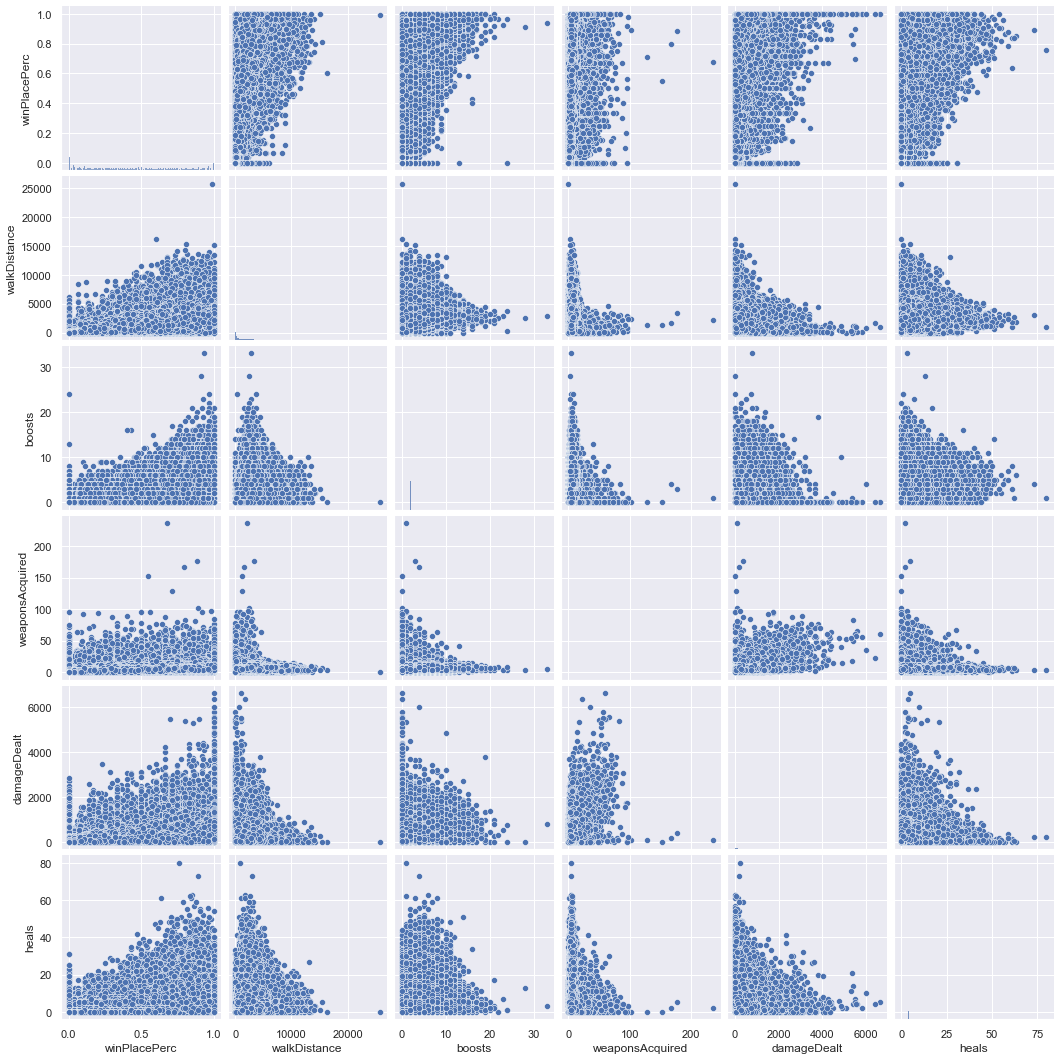

In [116]:
sns.pairplot(data=train, vars=['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired','damageDealt', 'heals'])
plt.show()

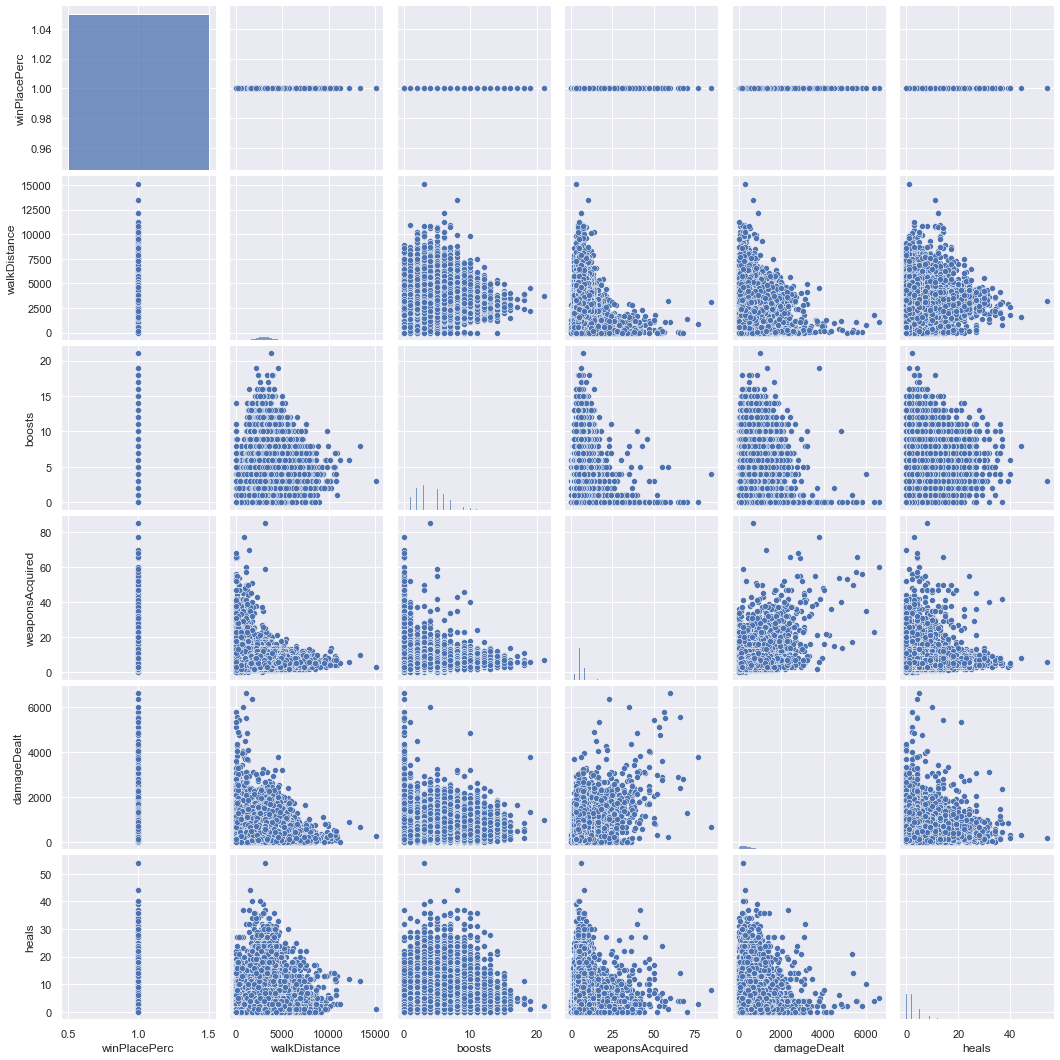

In [115]:
sns.pairplot(data=winner, vars=['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired','damageDealt', 'heals'])
plt.show()